# Deep Learning Fundamentals Lab 5 -- Intro to PyTorch Lightning

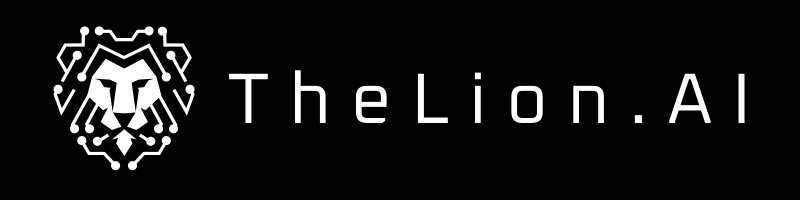

Welcome to the next installment of our Deep Learning Fundamentals laboratory series, presented by [TheLion.AI](https://www.thelion.ai/) — an interdisciplinary research group specializing in AI-based healthcare solutions. This comprehensive program is designed to equip you with practical skills in implementing deep learning models across various domains, with a special emphasis on natural language processing and computer vision. We like to make our software and teaching materials as accessible as possible. If you like what we do, consider supporting us at [https://buymeacoffee.com/thelionai](https://buymeacoffee.com/thelionai).

The course follows a progressive learning path, starting with foundational concepts and gradually building up to advanced techniques. Each lab session includes a brief overview of key concepts and hands-on coding exercises.

**New notebooks will be added weekly!**

### Syllabus
1. [Introduction to sci-kit learn](https://www.kaggle.com/code/basia25/introduction-to-scikit-learn/)
2. [Introduction to linear algebra in PyTorch](https://www.kaggle.com/code/basia25/introduction-to-linear-algebra-in-pytorch/)
3. [Neural network from scratch](https://www.kaggle.com/code/basia25/neural-network-from-scratch/)
4. [Neural network in pure PyTorch](https://www.kaggle.com/code/basia25/neural-network-in-pure-pytorch/)
5. [Neural network in PyTorch Lightning](https://www.kaggle.com/code/basia25/intro-to-pytorch-lightning)
6. [Regularization methods](https://www.kaggle.com/code/basia25/introduction-to-regularization/)
7. [Convolutional neural networks](https://www.kaggle.com/code/basia25/introduction-to-convolutional-neural-networks/)
8. [State-of-the-art CNNs](https://www.kaggle.com/code/basia25/introduction-to-state-of-the-art-cnns/)
9. [Image segmentation](https://www.kaggle.com/code/basia25/introduction-to-image-segmentation)
10. [NLP fundamentals](https://www.kaggle.com/code/basia25/introduction-to-nlp-fundamentals)
11. HuggingFace
12. Sentence transformers
13. Explainable AI
14. Image transformer and AI in Healthcare
15. Running experiments in ClearML
16. Creating smart configuration files with Hydra

# Introduction

In this exercise, you will enhance a basic neural network training setup by incorporating validation. Validation is crucial in machine learning as it allows you to assess how well your model generalizes to unseen data and helps prevent overfitting. You'll work with PyTorch Lightning, a lightweight wrapper for PyTorch that simplifies the training process and provides useful features like built-in support for TensorBoard logging.

### Key Concepts in PyTorch Lightning
- **LightningModule**: The central class that combines your model architecture, training logic, and optimization setup. It replaces the traditional PyTorch nn.Module while adding training-specific functionality.
- **Trainer**: The class that handles the entire training loop, including validation, testing, and prediction. It abstracts away boilerplate code related to training.
- **Automatic Optimization**: PyTorch Lightning automatically handles gradient calculation, optimizer zeroing, and backward passes when you return the loss from your training_step.
- **Validation Loop**: Built-in support for running validation during training, with separate methods for validation logic.
- **Logging and Metrics**: Integrated logging system that works with various logging backends like TensorBoard. Metrics can be logged at different frequencies (per step or per epoch).
- **Data Handling**: While not explicitly shown here, PyTorch Lightning encourages the use of DataModules to encapsulate data loading and preprocessing logic.
- **Callbacks and Extensions**: Mechanisms to extend functionality without modifying the core training loop, though this exercise doesn't require their use.

In [ ]:
!pip install torch

In [ ]:
!pip install pytorch-lightning
!pip install torchvision
!pip install torchmetrics

In [ ]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
import torchmetrics

## Create dataset and dataloader
We are using MNIST dataset. We create train, val and test splits and discard some portion of the dataset to speed up the training.
We create a training dataloader with `shuffle=True` to ensure that the model is exposed to a diverse set of examples during each epoch of training. This helps prevent the model from learning the order of the data and improves generalization. 

In [ ]:
dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())

train_set, val_set, test_set, other = torch.utils.data.random_split(dataset, [5000, 1000, 1000, 53000])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

## Define Your Model Architecture

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Sequential(nn.Linear(28 * 28, 64), nn.ReLU(),
                                nn.Linear(64, 128), nn.ReLU(),
                                nn.Linear(128, 10))

    def forward(self, x):
        return self.l1(x)

## Create a LightningModule Subclass

This class contains your training logic, metrics, and optimization configuration:

In [ ]:
class SimpleTraining(pl.LightningModule):
    def __init__(self, simplenet):
        super().__init__()
        self.simplenet = simplenet
        self.loss = nn.CrossEntropyLoss()
        self.train_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=10)

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        x, y = batch
        x = x.view(x.size(0), -1) # Flatten image
        y_hat = self.simplenet(x)
        J = self.loss(y_hat, y)
        self.train_accuracy(y_hat, y)

        self.log('train_loss', J, on_step=False, on_epoch=True)
        self.log('train_acc_step', self.train_accuracy, on_step=False, on_epoch=True)
        return J

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [ ]:
%load_ext tensorboard
%tensorboard --logdir tb_logs/

## Initialize the lightning module

In [ ]:
simple_training = SimpleTraining(SimpleNet())

### Initialize Tensorboard to monitor training

In [ ]:
tensorboard = TensorBoardLogger("tb_logs", name="simple_model")

##  Set Up the Trainer

In [ ]:
trainer = pl.Trainer(logger=tensorboard, max_epochs=100)

## Start Training

In [ ]:
trainer.fit(model=simple_training, train_dataloaders=train_loader)

In [ ]:
print(SimpleNet())

# Exercises

1. The training loop is missing a very important element - model validation. Create a data loader below for the validation set and create a new version of simple training with a method for validation. Create an error function and metrics for the validation set and log the results for validation separately. Display the results in TensorBoard. Describe the difference between the results for the training set and the validation set.

Checklist:
- [ ] create a validation dataloader using the provided validation dataset
- [ ] implement a validation method in the LightningModule
- [ ] define a loss function and metrics specifically for the validation set
- [ ] log validation results separately from training results
- [ ] display validation results in TensorBoard
- [ ] tensorboard
- [ ] analyze and comment on the differences between training and validation results

In [ ]:
# TODO: Create a validation dataloader

In [ ]:
class SimpleTrainingWithValidation(pl.LightningModule):
    def __init__(self, simplenet):
        super().__init__()
        self.simplenet = simplenet
        self.loss = nn.CrossEntropyLoss()
        self.train_acc = torchmetrics.Accuracy()

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        x, y = batch
        x = x.view(x.size(0), -1) # Flatten the image to a vector
        y_hat = self.simplenet(x)
        J = self.loss(y_hat, y)
        self.train_acc(y_hat, y)

        self.log('train_loss', J, on_step=False, on_epoch=True)
        self.log('train_acc', self.train_acc, on_step=False, on_epoch=True)
        return J

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

# TODO Validation: def ...